## Bivariate Analysis on Continuous Variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Ptython Timezone

In [3]:
pip install pytz

Note: you may need to restart the kernel to use updated packages.


In [4]:
import datetime
import pytz

In [11]:
dt = datetime.datetime(2021,5,11,10,49,50,tzinfo = pytz.UTC)
print(dt)

dt_now = datetime.datetime.now(tz = pytz.UTC)
print(dt_now)

dt_utcnow = datetime.datetime.utcnow().replace(tzinfo = pytz.UTC)
print(dt_utcnow)

2021-05-11 10:49:50+00:00
2021-05-11 05:21:21.254326+00:00
2021-05-11 05:21:21.254326+00:00


In [13]:
dt_now_utc = datetime.datetime.now(tz = pytz.UTC)
print(dt_now_utc)

#Convert to different timezone

dt_mtn = dt_now_utc.astimezone(pytz.timezone('US/Mountain'))
print(dt_mtn)

2021-05-11 05:23:06.739210+00:00
2021-05-10 23:23:06.739210-06:00


##### use of localize method to convert Naive datetime

In [16]:
dt_now = datetime.datetime.now()
mtn_tz = pytz.timezone("US/Mountain")

dt_mtn = mtn_tz.localize(dt_now)
print(dt_mtn)

2021-05-11 10:58:18.196736-06:00


##### Use of format code available in pthon documentation

In [18]:
dt = datetime.datetime.now(tz = pytz.timezone('US/Mountain'))
print(dt.strftime('%B %d, %Y'))

May 10, 2021


In [19]:
#Convert string to datetime

dt_str = 'May 15, 2021'
dt = datetime.datetime.strptime(dt_str, '%B %d, %Y')
print(dt)


2021-05-15 00:00:00


Note: 
1. strftime => DateTime to string
2. strptime => String to DateTime

## Back to Bivariate Analysis

In [55]:
df= pd.read_csv("EDA_Gold_Silver_prices.csv")
df.shape

(241, 3)

In [56]:
df.head()

,Month,SilverPrice,GoldPrice
0,Mar-97,186.48,12619.24
1,Apr-97,170.65,12338.59
2,May-97,170.44,12314.94
3,Jun-97,169.96,12202.78
4,Jul-97,155.80,11582.07


In [57]:
#converting Month in datetime form from string

df.Month = df.Month.apply(lambda x : datetime.datetime.strptime(x, '%b-%y'))
df.Month

0     1997-03-01
1     1997-04-01
2     1997-05-01
3     1997-06-01
4     1997-07-01
         ...    
236   2016-11-01
237   2016-12-01
238   2017-01-01
239   2017-02-01
240   2017-03-01
Name: Month, Length: 241, dtype: datetime64[ns]

##### Calculating Corelation between prices

In [58]:
df.corr()

,SilverPrice,GoldPrice
SilverPrice,1.000000,0.954256
GoldPrice,0.954256,1.000000


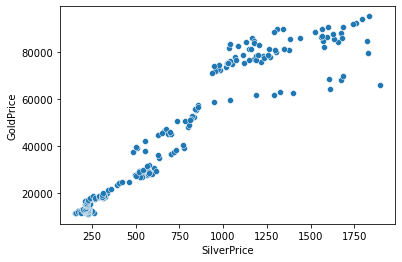

In [59]:
sns.scatterplot(x=df.SilverPrice, y=df.GoldPrice)
plt.show()

##### What is the correlation in Gold and Silver prices for the years 2008(nearest two decimal places )?

In [60]:
df.Month[0].year

1997

In [66]:
df["Year"] = df.Month.apply(lambda x : x.year)

In [76]:
df.Year.value_counts()

2007    12
2016    12
2000    12
2001    12
2002    12
2003    12
2004    12
2005    12
2006    12
2008    12
1998    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
1999    12
1997    10
2017     3
Name: Year, dtype: int64

In [70]:
df2 = df[df.Year == 2008]

In [71]:
df2

,Month,SilverPrice,GoldPrice,Year
130,2008-01-01,632.29,35025.78,2008
131,2008-02-01,701.87,36642.46,2008
132,2008-03-01,775.49,39082.77,2008
133,2008-04-01,700.96,36416.00,2008
134,2008-05-01,718.20,37435.38,2008
135,2008-06-01,729.63,38087.88,2008
136,2008-07-01,773.80,40256.56,2008
137,2008-08-01,625.97,36026.85,2008
138,2008-09-01,555.58,37815.02,2008
139,2008-10-01,507.20,39235.79,2008


In [72]:
df2.corr()

,SilverPrice,GoldPrice,Year
SilverPrice,1.000000,0.009584,NaN
GoldPrice,0.009584,1.000000,NaN
Year,NaN,NaN,NaN


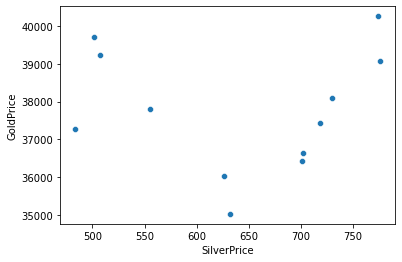

In [73]:
sns.scatterplot(x=df2.SilverPrice, y=df2.GoldPrice)
plt.show()

## Corelation Matrix

In [77]:
df = pd.read_csv("currencies.csv")

In [79]:
df.head()

,Currency,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
0,"July 01, 2016",9.29446,1.25367,143.645,1.05054,1.39596,NaN,1.87126,0.524882,NaN,...,20.3528,202.763,11.8246,1.36009,NaN,9.28428,3.06035,5.12668,NaN,13.9247
1,"July 05, 2016",9.31515,1.25322,142.715,1.06143,1.39684,154.063,1.85825,0.525213,15.2162,...,20.6240,202.886,11.7627,1.35689,49.0655,9.26724,NaN,5.12992,42.9026,13.9335
2,"July 06, 2016",9.31697,1.25834,140.540,1.07300,1.39286,154.094,1.87313,0.523717,15.2392,...,20.7232,NaN,11.8805,1.36208,49.0692,9.25643,NaN,5.11527,42.6425,13.8938
3,"July 07, 2016",9.31315,1.25737,140.640,1.06911,1.39316,153.957,1.85236,0.523829,15.1430,...,20.4288,202.351,11.9192,1.36098,49.0295,NaN,NaN,5.11637,42.4176,13.8968
4,"July 08, 2016",9.31350,1.25797,140.510,1.07261,1.39257,154.062,1.85974,0.523607,15.1202,...,20.6063,202.271,11.9327,1.36472,49.0408,9.26432,NaN,5.11423,42.2060,13.8909


In [80]:
df.shape

(11, 52)

In [81]:
#We can get correlation matric using corr function 
df.corr()

,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,Brazilian Real,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
Chinese Yuan,1.000000,0.151596,0.117566,0.108695,0.291582,8.152155e-01,0.077983,0.291926,4.676926e-01,0.320508,...,0.356889,0.296118,-0.044773,-0.069368,5.851485e-01,0.215925,0.542852,0.291300,4.215738e-01,0.292168
Euro,0.151596,1.000000,-0.645719,0.531150,-0.210587,2.599639e-01,0.331588,-0.209926,4.696684e-01,0.383645,...,0.382248,-0.234048,0.756618,0.277528,3.702819e-01,-0.621466,0.257016,-0.210770,-4.788910e-02,-0.210364
Japanese Yen,0.117566,-0.645719,1.000000,-0.970308,0.210295,-3.880988e-01,-0.582032,0.209957,-6.270147e-01,-0.641122,...,-0.629790,0.216936,-0.484786,0.209928,-4.580429e-01,0.952893,-0.147436,0.210296,-5.130655e-01,0.210351
U.K. Pound Sterling,0.108695,0.531150,-0.970308,1.000000,-0.042303,6.131856e-01,0.579213,-0.042220,6.890693e-01,0.731765,...,0.691677,-0.063891,0.439605,-0.274110,4.847034e-01,-0.884769,0.379161,-0.042522,5.128468e-01,-0.042480
U.S. Dollar,0.291582,-0.210587,0.210295,-0.042303,1.000000,8.220362e-01,0.607010,0.999999,5.808417e-01,-0.340426,...,0.596483,0.999985,-0.671798,-0.734504,4.573712e-01,0.135467,-0.481887,0.999999,6.658314e-01,0.999999
Algerian Dinar,0.815216,0.259964,-0.388099,0.613186,0.822036,1.000000e+00,0.908465,0.822349,8.833664e-01,0.401592,...,0.910574,0.872504,-0.157963,-0.561866,9.175429e-01,-0.321122,0.600139,0.821881,6.013162e-01,0.822238
Australian Dollar,0.077983,0.331588,-0.582032,0.579213,0.607010,9.084652e-01,1.000000,0.607349,9.572341e-01,0.071958,...,0.913906,0.687806,-0.067537,-0.651600,7.695417e-01,-0.504815,-0.677335,0.607053,7.108155e-01,0.607077
Bahrain Dinar,0.291926,-0.209926,0.209957,-0.042220,0.999999,8.223489e-01,0.607349,1.000000,5.814349e-01,-0.340569,...,0.596910,0.999984,-0.671219,-0.734555,4.576994e-01,0.135350,-0.482659,0.999999,6.660374e-01,0.999999
Botswana Pula,0.467693,0.469668,-0.627015,0.689069,0.580842,8.833664e-01,0.957234,0.581435,1.000000e+00,0.220811,...,0.977147,0.671245,-0.068228,-0.707980,7.257790e-01,-0.575553,-0.344260,0.580858,8.612704e-01,0.581198
Brazilian Real,0.320508,0.383645,-0.641122,0.731765,-0.340426,4.015918e-01,0.071958,-0.340569,2.208112e-01,1.000000,...,0.249574,-0.348204,0.604634,0.172026,4.482017e-01,-0.449111,0.935040,-0.340725,-1.463372e-03,-0.340619


##### Draw color gradient corelation matrix

In [95]:
correlation = df.corr()
correlation.style.background_gradient(cmap='Greens')

,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,Brazilian Real,Brunei Dollar,Canadian Dollar,Chilean Peso,Czech Koruna,Danish Krone,Hungarian Forint,Icelandic Krona,Indian Rupee,Israeli New Sheqel,Kazakhstani Tenge,Kuwaiti Dinar,Libyan Dinar,Malaysian Ringgit,Mauritian Rupee,Mexican Peso,Nepalese Rupee,New Zealand Dollar,Norwegian Krone,Rial Omani,Pakistani Rupee,Nuevo Sol,Philippine Peso,Polish Zloty,Qatar Riyal,Russian Ruble,Saudi Arabian Riyal,Singapore Dollar,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
Chinese Yuan,1.000000,0.151596,0.117566,0.108695,0.291582,0.815216,0.077983,0.291926,0.467693,0.320508,0.499400,-0.186643,0.028821,-0.000742,0.190088,0.092517,-0.094406,0.304050,0.442994,-0.349278,0.051050,nan,0.235758,0.273543,0.585242,-0.048039,0.158424,0.011336,0.291726,0.808891,0.690147,0.161906,0.415765,0.291630,0.184050,0.291155,0.499400,0.356889,0.296118,-0.044773,-0.069368,0.585148,0.215925,0.542852,0.291300,0.421574,0.292168
Euro,0.151596,1.000000,-0.645719,0.531150,-0.210587,0.259964,0.331588,-0.209926,0.469668,0.383645,0.103766,0.638422,0.242743,0.952136,0.997624,0.500416,0.409634,0.243851,0.643255,-0.522276,-0.029612,nan,0.462882,-0.183599,0.406158,0.247677,0.169274,0.848789,-0.209931,-0.759606,-0.425412,-0.314072,0.609706,-0.210148,0.348002,-0.210800,0.103766,0.382248,-0.234048,0.756618,0.277528,0.370282,-0.621466,0.257016,-0.210770,-0.047889,-0.210364
Japanese Yen,0.117566,-0.645719,1.000000,-0.970308,0.210295,-0.388099,-0.582032,0.209957,-0.627015,-0.641122,-0.260258,-0.662233,-0.809751,-0.629068,-0.668736,-0.572344,-0.834549,-0.270123,-0.798265,0.610230,0.376778,nan,-0.602250,0.167648,-0.497609,-0.602069,0.008359,-0.818583,0.209915,0.977676,-0.149566,0.717931,-0.806694,0.210217,-0.774645,0.209975,-0.260258,-0.629790,0.216936,-0.484786,0.209928,-0.458043,0.952893,-0.147436,0.210296,-0.513065,0.210351
U.K. Pound Sterling,0.108695,0.531150,-0.970308,1.000000,-0.042303,0.613186,0.579213,-0.042220,0.689069,0.731765,0.325791,0.670759,0.702740,0.491249,0.564435,0.486629,0.760730,0.314681,0.846940,-0.497732,-0.492609,nan,0.623274,0.115298,0.586498,0.551789,-0.105797,0.728907,-0.042119,-0.550338,0.330242,-0.389512,0.866656,-0.042458,0.724416,-0.042236,0.325791,0.691677,-0.063891,0.439605,-0.274110,0.484703,-0.884769,0.379161,-0.042522,0.512847,-0.042480
U.S. Dollar,0.291582,-0.210587,0.210295,-0.042303,1.000000,0.822036,0.607010,0.999999,0.580842,-0.340426,0.645133,-0.025276,0.465683,0.063391,-0.182763,0.401028,0.367329,0.872862,0.164293,0.238602,0.902196,nan,0.470035,0.946580,0.403862,0.641744,0.350211,-0.474763,1.000000,0.997159,0.963550,0.203239,0.124429,0.999999,0.521178,0.999999,0.645133,0.596483,0.999985,-0.671798,-0.734504,0.457371,0.135467,-0.481887,0.999999,0.665831,0.999999
Algerian Dinar,0.815216,0.259964,-0.388099,0.613186,0.822036,1.000000,0.908465,0.822349,0.883366,0.401592,0.851882,0.295338,0.774855,0.406637,0.311716,0.570454,0.837613,0.923232,0.853723,-0.063087,0.617849,0.000000,0.892976,0.848173,0.740673,0.891683,0.246243,0.092266,0.822413,0.982313,0.726759,0.124527,0.783491,0.822200,0.885316,0.821995,0.851882,0.910574,0.872504,-0.157963,-0.561866,0.917543,-0.321122,0.600139,0.821881,0.601316,0.822238
Australian Dollar,0.077983,0.331588,-0.582032,0.579213,0.607010,0.908465,1.000000,0.607349,0.957234,0.071958,0.641138,0.422272,0.761295,0.532192,0.369431,0.810955,0.855761,0.921475,0.602386,0.005796,0.727243,nan,0.824098,0.745382,0.573500,0.938209,0.429160,0.155883,0.607400,-0.250614,0.529584,-0.158866,0.592071,0.607177,0.855181,0.607159,0.641138,0.913906,0.687806,-0.067537,-0.651600,0.769542,-0.504815,-0.677335,0.607053,0.710815,0.607077
Bahrain Dinar,0.291926,-0.209926,0.209957,-0.042220,0.999999,0.822349,0.607349,1.000000,0.581435,-0.340569,0.645139,-0.025220,0.465498,0.064013,-0.182083,0.401776,0.367306,0.873195,0.

##### To get the corelation between two columns
Indian rupee is the most correlated with:

In [103]:
#To get the corelation between two columns

print(df['Australian Dollar'].corr(df['Indian Rupee']))
print(df['U.S. Dollar'].corr(df['Indian Rupee']))
print(df['Euro'].corr(df['Indian Rupee']))
print(df['Japanese Yen'].corr(df['Indian Rupee']))

0.9214754518981331
0.8728617382644548
0.24385071994533072
-0.2701234915502576


In [106]:
print(df['Australian Dollar'].corr(df['Indian Rupee']))
print(df['U.S. Dollar'].corr(df['Indian Rupee']))
print(df['Euro'].corr(df['Indian Rupee']))
print(df['Japanese Yen'].corr(df['U.S. Dollar']))

0.9214754518981331
0.8728617382644548
0.24385071994533072
-0.2701234915502576
